In [1]:
import os
import re
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from matplotlib.cm import get_cmap

In [2]:
def load_polygon_from_txt(txt_path):
    coords = []
    with open(txt_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line or line.startswith("Polygon exterior"):
                continue  # 헤더 스킵
            try:
                lon, lat = map(float, line.split(","))
                coords.append((lon, lat))
            except ValueError:
                continue  # 잘못된 줄은 무시
    if len(coords) >= 3:
        return Polygon(coords)
    else:
        return None  # 유효한 다각형 아님
    

def draw_all_polygons(directory="."):
    # 폴리곤 파일 목록 가져오기
    polygon_files = sorted(
        [f for f in os.listdir(directory) if re.match(r"^polygon\d+\.txt$", f)],
        key=lambda x: int(re.search(r"\d+", x).group())
    )

    cmap = get_cmap("hsv", len(polygon_files))  # 무지개 색상 (HSV colormap)

    plt.figure(figsize=(10, 8))
    ax = plt.gca()
    for i, fname in enumerate(polygon_files):
        poly = load_polygon_from_txt(os.path.join(directory, fname))
        if poly is None:
            continue
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.4, label=f"{fname}", color=cmap(i))

    ax.set_aspect("equal")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("All Saved Polygons")
    plt.legend()
    plt.grid(True)
    plt.show()


개선 사항:
- 지도 표시(좌표가 맞아야됨)
- 하나씩 그려서 얹기(레이어 선택)
- 확률도 히트맵으로 그리기

(가능하면) 현재 위치도 표시

/var/folders/w9/_qn43d_j5l37kv2ls_rf5z9m0000gn/T/ipykernel_6463/3747981812.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("hsv", len(polygon_files))  # 무지개 색상 (HSV colormap)


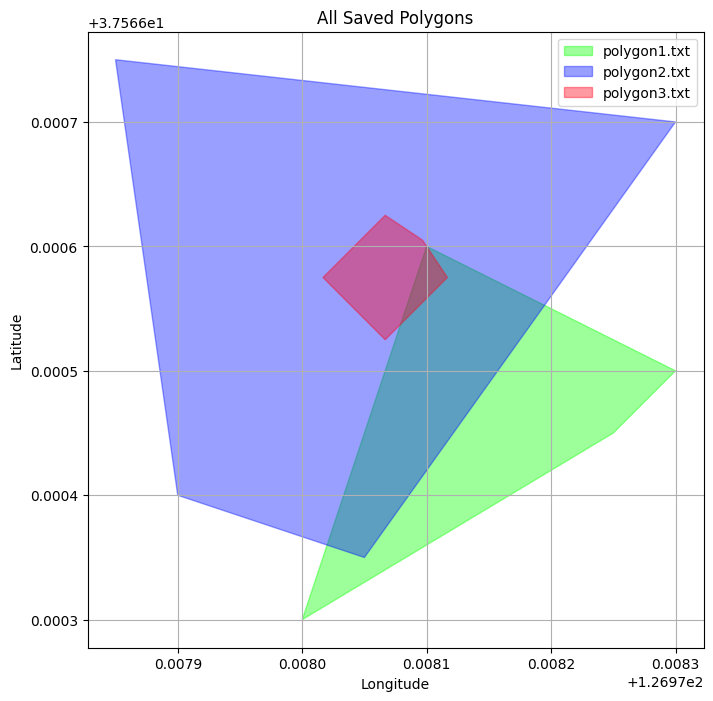

In [6]:
log_dir = os.path.join(os.getcwd(), "log")
files = os.listdir(log_dir)
draw_all_polygons(log_dir)